## train on colab

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# %%timeit -r 3 -n 10
chosen_dur = [3, 9, 15]
D = 7
M = 3
S = 700

chosen_dur = np.array(chosen_dur)
starting_idxs, ending_idxs = ((chosen_dur-3)/2)*M*S, ((chosen_dur-3)/2+1)*M*S

idx_not_chosen = np.array(range(int(D*M*S)))
idx_chosen = np.array([])
for start, end in zip(starting_idxs, ending_idxs):
    idx_not_chosen = np.setdiff1d(idx_not_chosen, range(int(start), int(end)))
    idx_chosen = np.append(idx_chosen, range(int(start), int(end)))
# idx_chosen =  np.setdiff1d(np.array(range(int(D*M*S))), idx_not_chosen)

In [97]:
# merge the chosen and not chosen indices
idx_chosen = np.append(idx_chosen, idx_not_chosen)
idx_chosen = np.sort(idx_chosen)
np.sum(idx_chosen == np.array(range(int(D*M*S))))

14700

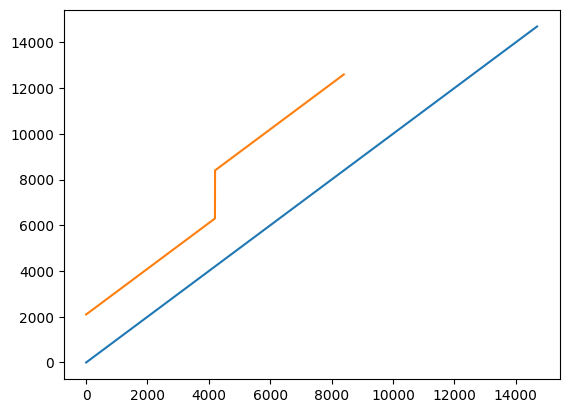

In [98]:
plt.plot(idx_chosen)
plt.plot(idx_not_chosen)

(-10.0, 10.0)

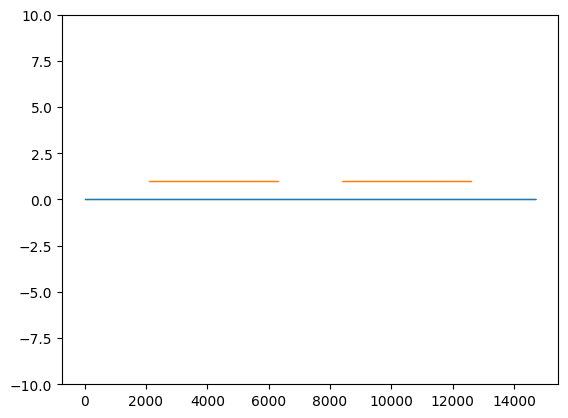

In [99]:
plt.plot(idx_chosen, np.zeros(len(idx_chosen)), 'x', ms=0.1)
plt.plot(idx_not_chosen, 1*np.ones(len(idx_not_chosen)), 'x', ms=0.1)
plt.ylim([-10, 10])

In [ ]:
# add access to the google drive files
from google.colab import drive
drive.mount('/content/drive')


In [1]:
data_dir = '../../data/dataset/dataset_L0_exp_set_0.h5'

import h5py
import numpy as np
import torch
import zarr
f =  h5py.File(data_dir, 'r')
print(f.keys())
f['set_0'].keys()
idx_not_chosen = np.array([0, 1, 2])

# save into np file
np.save('probR.npy', f['set_0']['probR'][:])
torch.save(torch.from_numpy(f['set_0']['probR'][:]), 'probR.pt')
zarr.save('probR.zarr', f['set_0']['probR'][:])
# load the np file
f['set_0']['probR'][:].shape

<KeysViewHDF5 ['set_0', 'set_1', 'set_10', 'set_100', 'set_11', 'set_12', 'set_13', 'set_14', 'set_15', 'set_16', 'set_17', 'set_18', 'set_19', 'set_2', 'set_20', 'set_21', 'set_22', 'set_23', 'set_24', 'set_25', 'set_26', 'set_27', 'set_28', 'set_29', 'set_3', 'set_30', 'set_31', 'set_32', 'set_33', 'set_34', 'set_35', 'set_36', 'set_37', 'set_38', 'set_39', 'set_4', 'set_40', 'set_41', 'set_42', 'set_43', 'set_44', 'set_45', 'set_46', 'set_47', 'set_48', 'set_49', 'set_5', 'set_50', 'set_51', 'set_52', 'set_53', 'set_54', 'set_55', 'set_56', 'set_57', 'set_58', 'set_59', 'set_6', 'set_60', 'set_61', 'set_62', 'set_63', 'set_64', 'set_65', 'set_66', 'set_67', 'set_68', 'set_69', 'set_7', 'set_70', 'set_71', 'set_72', 'set_73', 'set_74', 'set_75', 'set_76', 'set_77', 'set_78', 'set_79', 'set_8', 'set_80', 'set_81', 'set_82', 'set_83', 'set_84', 'set_85', 'set_86', 'set_87', 'set_88', 'set_89', 'set_9', 'set_90', 'set_91', 'set_92', 'set_93', 'set_94', 'set_95', 'set_96', 'set_97', 'set

(14700, 5000)

In [2]:
%%timeit -n 1 -r 3
probR = np.load('probR.npy')

114 ms ± 5.27 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [3]:
%%timeit -n 3 -r 10
probR = torch.load('probR.pt')[:400]

182 ms ± 10.3 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)


In [7]:
%%timeit -n 3 -r 10
probR = f['set_0']['probR'][np.array([1,2,5])].shape

The slowest run took 6.20 times longer than the fastest. This could mean that an intermediate result is being cached.
390 µs ± 289 µs per loop (mean ± std. dev. of 10 runs, 3 loops each)


In [6]:
%%timeit -n 3 -r 10
probR = zarr.load('probR.zarr')[:][:400]

352 ms ± 8.98 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)
